In [301]:
#----- Import the necessary library
# Libraries for Numerical and Data analysis
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# warnings and ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [302]:
# Display to show max 300 cols and 500 rows
pd.set_option("display.max_columns",300)
pd.set_option("display.max_rows",500)

In [303]:
#----- Data loading & Understanding

# read the dataset loan.csv
df=pd.read_csv("loan.csv",low_memory=False)

# top few records of dataset
df.head()

# basic information about dataset
df.info()

# statistical details of dataset
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [304]:
#######----- Cleaning Dataset

# Check duplicates
df.duplicated().sum()

0

In [305]:
# removing all the columns with all the values as NA
df=df.dropna(axis=1, how='all')

# find % of missing values before cleansing
#print(100*df.isnull().mean())

# removing columns with more than 30% null values
null_cols_perc=df.isna().sum()*100/df.shape[0]
df_clean=df.loc[:,(null_cols_perc < 30)]

In [306]:
#Finding number of unique values in each column
df_clean.nunique().sort_values().head(20)

tax_liens                      1
delinq_amnt                    1
chargeoff_within_12_mths       1
acc_now_delinq                 1
application_type               1
policy_code                    1
collections_12_mths_ex_med     1
initial_list_status            1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
verification_status            3
loan_status                    3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
dtype: int64

In [307]:
# Find columns having unique values for all rows

# List of columns to check for unique values
columns_to_check = [
    'application_type',
    'collections_12_mths_ex_med',
    'delinq_amnt',
    'tax_liens',
    'acc_now_delinq',
    'policy_code',
    'initial_list_status',
    'pymnt_plan',
    'chargeoff_within_12_mths'
]

# Loop through the columns and print value counts
for column in columns_to_check:
    print(f"{column} value counts:\n{df_clean[column].value_counts()}\n")



application_type value counts:
application_type
INDIVIDUAL    39717
Name: count, dtype: int64

collections_12_mths_ex_med value counts:
collections_12_mths_ex_med
0.0    39661
Name: count, dtype: int64

delinq_amnt value counts:
delinq_amnt
0    39717
Name: count, dtype: int64

tax_liens value counts:
tax_liens
0.0    39678
Name: count, dtype: int64

acc_now_delinq value counts:
acc_now_delinq
0    39717
Name: count, dtype: int64

policy_code value counts:
policy_code
1    39717
Name: count, dtype: int64

initial_list_status value counts:
initial_list_status
f    39717
Name: count, dtype: int64

pymnt_plan value counts:
pymnt_plan
n    39717
Name: count, dtype: int64

chargeoff_within_12_mths value counts:
chargeoff_within_12_mths
0.0    39661
Name: count, dtype: int64



In [308]:
# Drop the above listed columns having same value to all rows, not usefull for analysis
df_clean.drop(
                ['delinq_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tax_liens','application_type', 
                 'policy_code', 'collections_12_mths_ex_med','initial_list_status', 'chargeoff_within_12_mths',
                 'initial_list_status', 'chargeoff_within_12_mths', 'pymnt_plan'], 
                axis = 1, inplace = True
                )


In [309]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [310]:
#### Drop columns which are not useful for analysis

drop_cols = ['id','member_id','funded_amnt','funded_amnt_inv','installment','emp_title', 'url', 
             'title', 'zip_code','earliest_cr_line', 'inq_last_6mths', 'revol_bal','out_prncp','out_prncp_inv', 
             'total_pymnt', 'total_pymnt_inv','total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
             'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt','last_pymnt_d','last_credit_pull_d'
             ]

df_clean.drop(columns = drop_cols, axis = 1, inplace = True)

In [311]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   term                  39717 non-null  object 
 2   int_rate              39717 non-null  object 
 3   grade                 39717 non-null  object 
 4   sub_grade             39717 non-null  object 
 5   emp_length            38642 non-null  object 
 6   home_ownership        39717 non-null  object 
 7   annual_inc            39717 non-null  float64
 8   verification_status   39717 non-null  object 
 9   issue_d               39717 non-null  object 
 10  loan_status           39717 non-null  object 
 11  purpose               39717 non-null  object 
 12  addr_state            39717 non-null  object 
 13  dti                   39717 non-null  float64
 14  delinq_2yrs           39717 non-null  int64  
 15  open_acc           

In [312]:
df_clean.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,36 months,10.65%,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,3,0,83.70%,9,0.0
1,2500,60 months,15.27%,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,3,0,9.40%,4,0.0
2,2400,36 months,15.96%,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,2,0,98.50%,10,0.0
3,10000,36 months,13.49%,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,10,0,21%,37,0.0
4,3000,60 months,12.69%,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0,15,0,53.90%,38,0.0


In [313]:
# remove '%' and convert to 'float' data type
df_clean['int_rate'] = df_clean['int_rate'].str.replace('%', '').astype('float')
df_clean['revol_util'] = df_clean['revol_util'].str.replace('%', '').astype('float')

In [314]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   term                  39717 non-null  object 
 2   int_rate              39717 non-null  float64
 3   grade                 39717 non-null  object 
 4   sub_grade             39717 non-null  object 
 5   emp_length            38642 non-null  object 
 6   home_ownership        39717 non-null  object 
 7   annual_inc            39717 non-null  float64
 8   verification_status   39717 non-null  object 
 9   issue_d               39717 non-null  object 
 10  loan_status           39717 non-null  object 
 11  purpose               39717 non-null  object 
 12  addr_state            39717 non-null  object 
 13  dti                   39717 non-null  float64
 14  delinq_2yrs           39717 non-null  int64  
 15  open_acc           

In [315]:
# imputing numerical columns
num_cols = df_clean.select_dtypes(include=["float", "int64"]).columns
for col in num_cols:
    df_clean.loc[:, col] = df_clean[col].fillna(df_clean[col].median())

# imputing categorical columns
cat_cols=df_clean.select_dtypes(include=["object"]).columns
for col in cat_cols:
    df_clean.loc[:, col] = df_clean[col].fillna(df_clean[col].mode()[0])


# filtering dataset by removing all the rows with loan_status as 'Current'
df_clean = df_clean[df_clean['loan_status'] != 'Current']


# find % of missing values after cleansing
#print(100*df_clean.isnull().mean())

In [316]:
# changing the case of columns to standardise
df_clean.loc[:, ['purpose']] = df_clean.loc[:, ['purpose']].apply(lambda x: x.str.title())


In [317]:
# Derive year and month from issue_d
df_clean['issue_d'] = pd.to_datetime(df_clean['issue_d'], format='%b-%y')
df_clean['issue_year'] = df_clean['issue_d'].dt.year
df_clean['issue_month'] = df_clean['issue_d'].dt.strftime('%b')

In [318]:
# Drop 'issue_d' columns as it is not required
df_clean.drop(['issue_d'], axis = 1, inplace = True)

In [319]:
df_clean.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,issue_year,issue_month
0,5000,36 months,10.65,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,Credit_Card,AZ,27.65,0,3,0,83.7,9,0.0,2011,Dec
1,2500,60 months,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,Car,GA,1.00,0,3,0,9.4,4,0.0,2011,Dec
2,2400,36 months,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,Small_Business,IL,8.72,0,2,0,98.5,10,0.0,2011,Dec
3,10000,36 months,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,Other,CA,20.00,0,10,0,21.0,37,0.0,2011,Dec
5,5000,36 months,7.90,A,A4,3 years,RENT,36000.0,Source Verified,Fully Paid,Wedding,AZ,11.20,0,9,0,28.3,12,0.0,2011,Dec


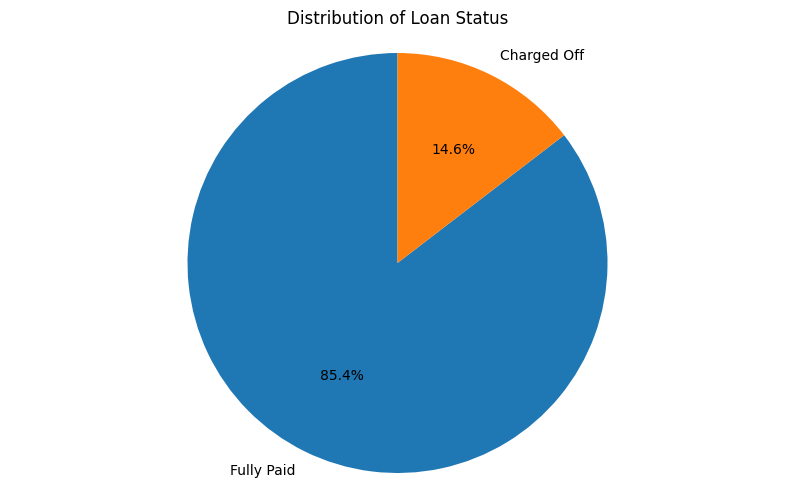

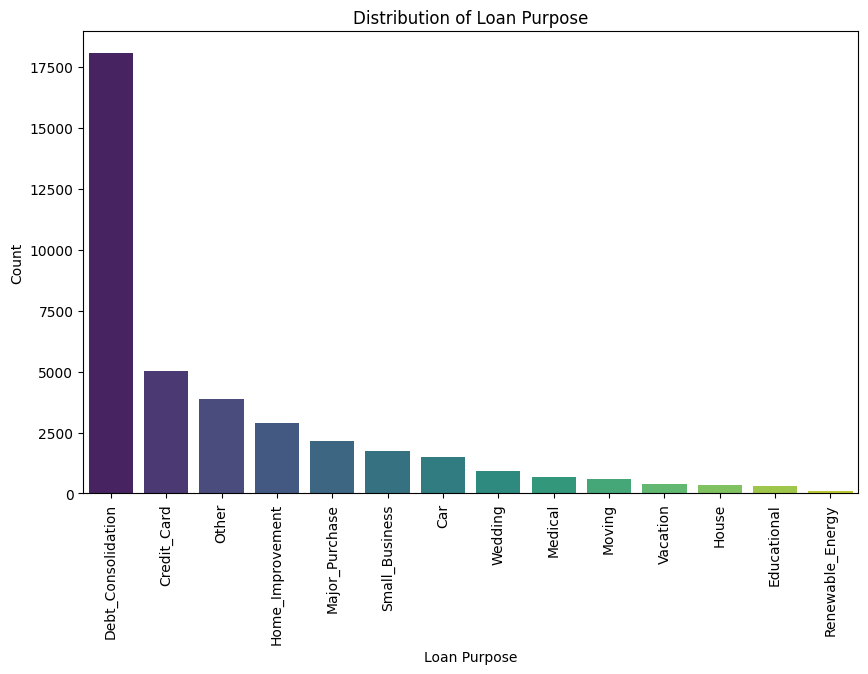

In [320]:
#########################----- Univariate analysis on few columns --------#########################################

#-- loan status
# pie chart of loan status
loan_status_value = df_clean['loan_status'].value_counts()

plt.figure(figsize=(10,6))
plt.pie(loan_status_value, labels=loan_status_value.index,autopct='%1.1f%%', startangle=90)

# adding titles and label
plt.title('Distribution of Loan Status')
plt.axis('equal')  # equal aspect ratio ensures that pie is drawn as a circle
plt.show()  # show pie chart

#-- loan purpose
# bar plot of loan purpose
loan_purpose_value = df_clean["purpose"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=loan_purpose_value.index, y=loan_purpose_value.values,hue=loan_purpose_value.index,palette='viridis')

# adding titles and labels
plt.title('Distribution of Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()  # show bar plot


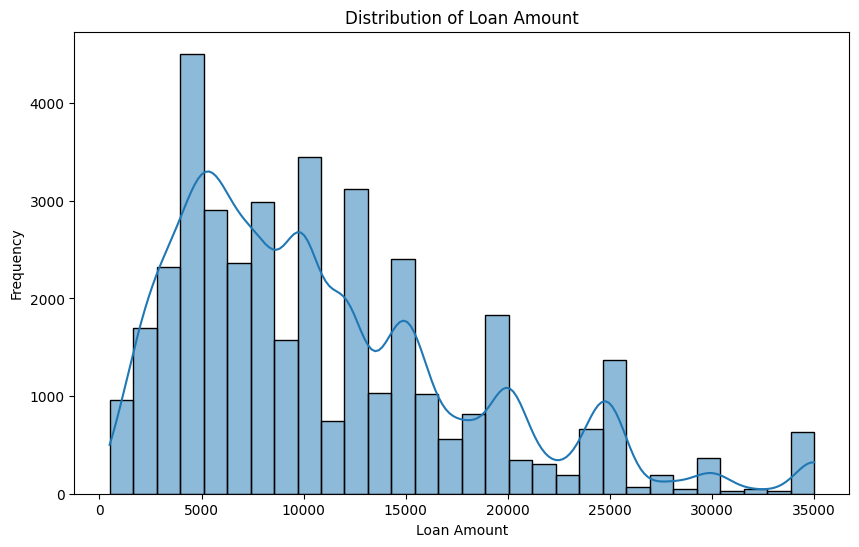

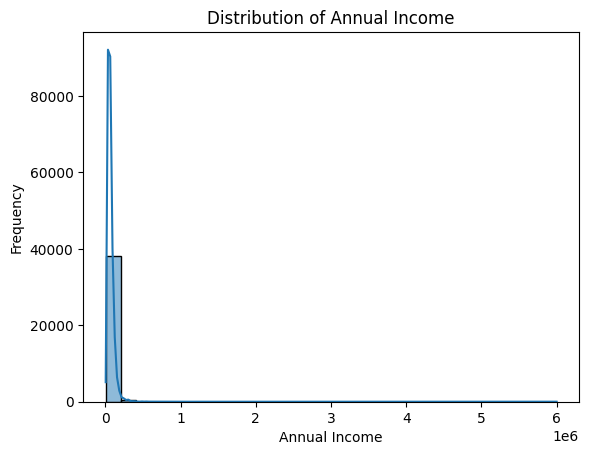

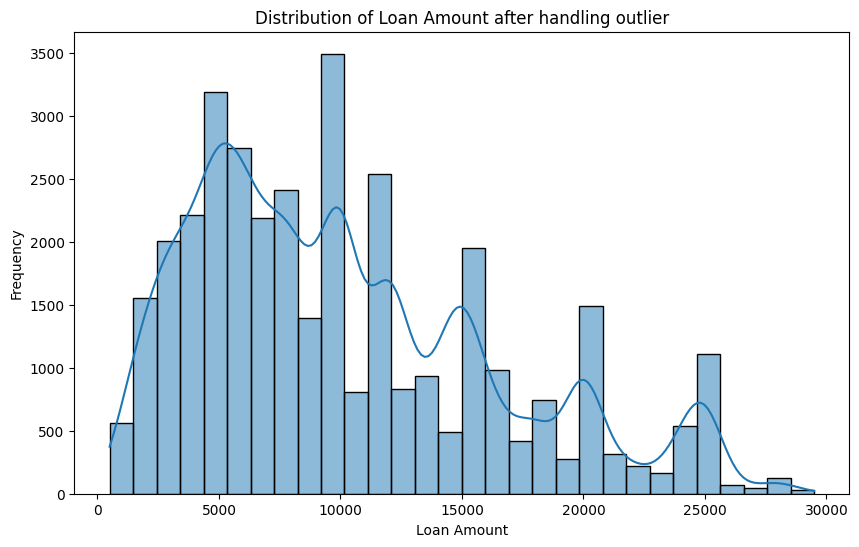

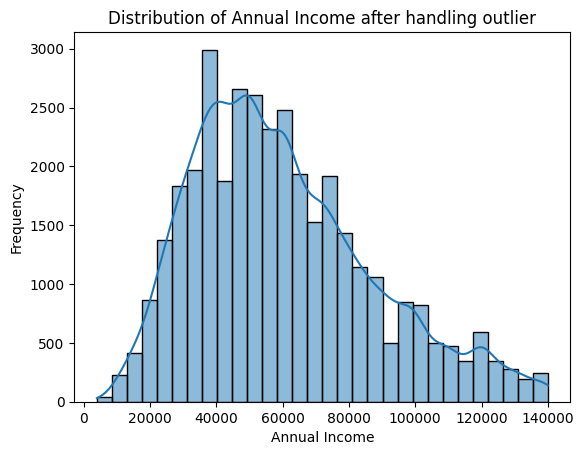

Rows removed: 3889


In [321]:

#----- Analysing loan amount & annual income, checking and handling outliers

# histogram before handling outliers
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['loan_amnt'], bins=30,kde=True)
# adding titles and label
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

sns.histplot(df_clean['annual_inc'], bins=30,kde=True)
# adding titles and label
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

# create a copy of the original dataframe for cleaning
df_cleaned = df_clean.copy()

# process each column to filter out outliers
for col in ['loan_amnt', 'annual_inc']:
    # calculate Q1 and Q3
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1

    # define lower and upper bounds for outliers
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Filter out outliers directly in df_cleaned
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_limit) & (df_cleaned[col] <= upper_limit)]

# histogram after handling outliers
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['loan_amnt'], bins=30,kde=True)
# adding titles and label
plt.title('Distribution of Loan Amount after handling outlier')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

sns.histplot(df_cleaned['annual_inc'], bins=30,kde=True)
# adding titles and label
plt.title('Distribution of Annual Income after handling outlier')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

# Summary of rows removed
removed_rows = len(df) - len(df_cleaned)
print(f"Rows removed: {removed_rows}")


In [322]:
df_clean.int_rate.describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

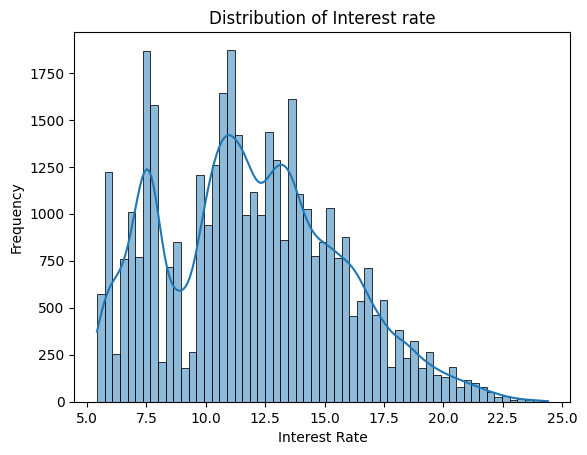

In [323]:
#### Distribution of Interest rate
sns.histplot(data = df_clean, x = 'int_rate', kde = True)
plt.title("Distribution of Interest rate")
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

In [324]:
df_clean.dti.describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

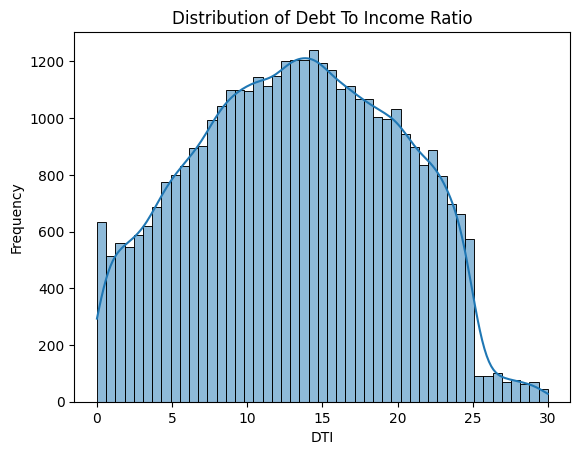

In [325]:
### Distribution of Debt To Income Ratio
sns.histplot(data = df_clean, x = 'dti', kde = True)
plt.title("Distribution of Debt To Income Ratio")
plt.xlabel('DTI')
plt.ylabel('Frequency')
plt.show()

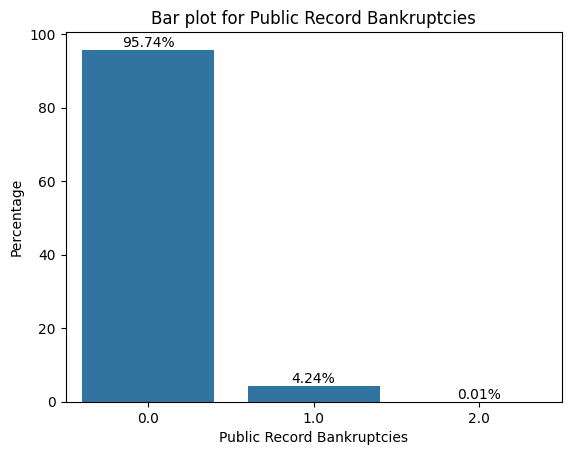

In [326]:
### Bar plot for Public Record Bankruptcies
sns.barplot(data = df_clean.pub_rec_bankruptcies.value_counts(normalize = True)*100)
plt.title("Bar plot for Public Record Bankruptcies")
plt.xlabel('Public Record Bankruptcies')
plt.ylabel('Percentage')

# Display counts on each bar
plt.bar_label(plt.gca().containers[0], fmt= '%.2f%%')
plt.show()

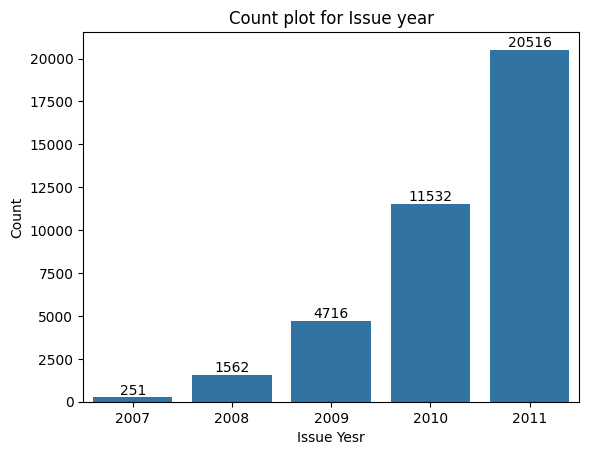

In [327]:
#### Count plot for Issue year
ax = sns.countplot(data = df_clean, x = 'issue_year')
plt.title("Count plot for Issue year")
plt.xlabel('Issue Yesr')
plt.ylabel('Count')

# Disply the counts on each bar using bar_label
for container in ax.containers:
    ax.bar_label(container)
plt.show()

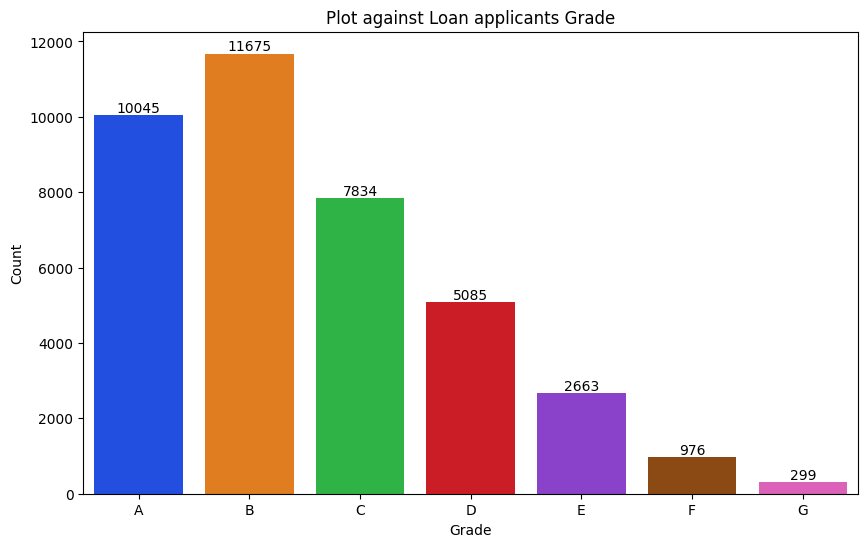

In [328]:
##### Plot against Loan applicants Grade

plt.figure(figsize = [10,6])

ax = sns.countplot(x = df_clean['grade'].sort_values(), palette = 'bright')

plt.title('Plot against Loan applicants Grade')
plt.xlabel('Grade')
plt.ylabel('Count')

# display count of applicants by loan subgrade on top of bar using bar_label
for container in ax.containers:
    ax.bar_label(container)

plt.show()

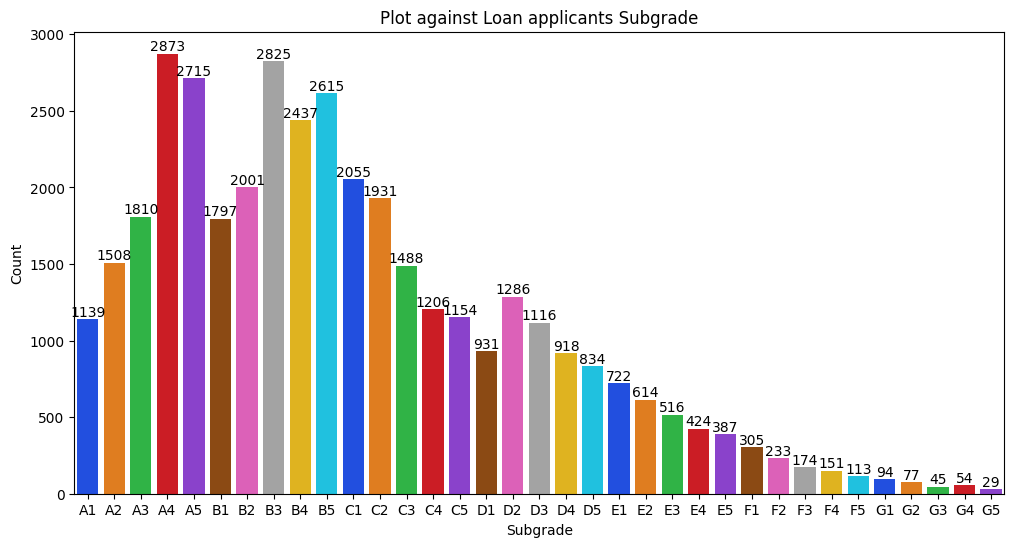

In [329]:
######### Plot against Loan applicants Subgrade

plt.figure(figsize = [12,6])

ax = sns.countplot(x = df_clean['sub_grade'].sort_values(), palette = 'bright')

plt.title('Plot against Loan applicants Subgrade')
plt.xlabel('Subgrade')
plt.ylabel('Count')

# display count of applicants by loan subgrade on top of bar using bar_label
for container in ax.containers:
    ax.bar_label(container)

plt.show()

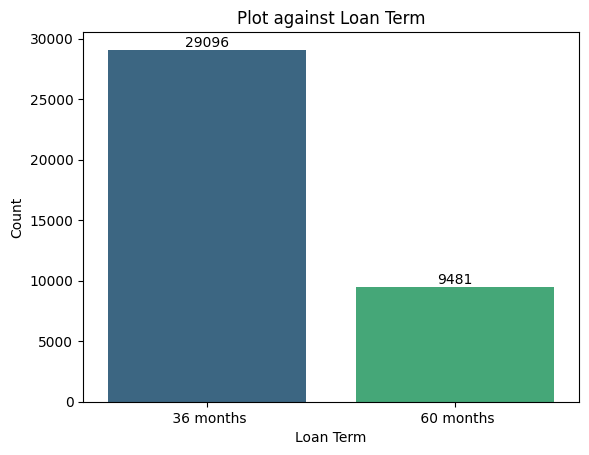

In [330]:
####### Plot against Loan Term
ax = sns.countplot(data = df_clean, x = 'term', palette = 'viridis' )

plt.title('Plot against Loan Term')
plt.xlabel('Loan Term')
plt.ylabel('Count') 

# Display counts on each bar
for container in ax.containers:
    ax.bar_label(container)

plt.show()

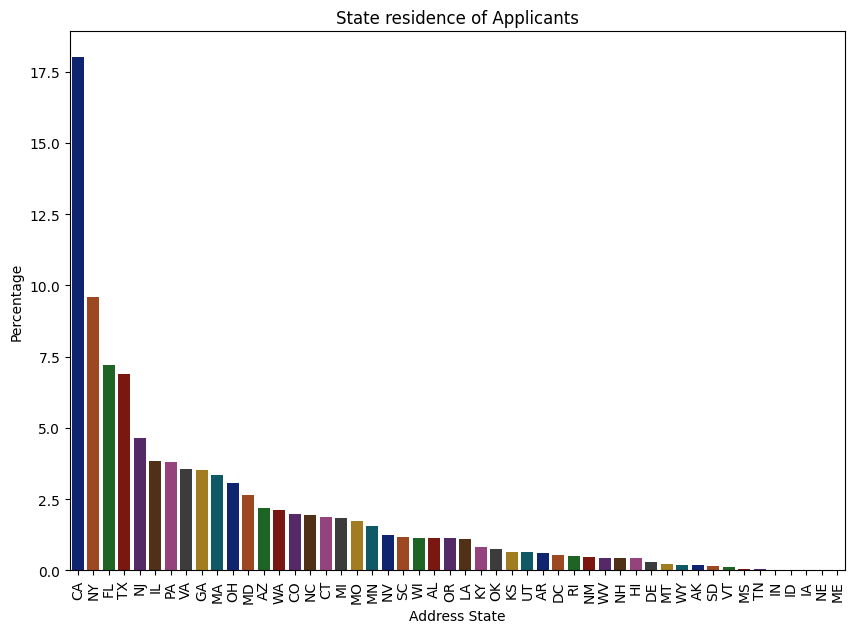

In [331]:
######## State residence of Applicants

plt.figure(figsize=[10,7])

sns.barplot(data = df_clean['addr_state'].value_counts(normalize = True) * 100 , palette = 'dark')

plt.title('State residence of Applicants')
plt.xlabel('Address State')
plt.ylabel('Percentage') 
plt.xticks(rotation = 90)

plt.show()

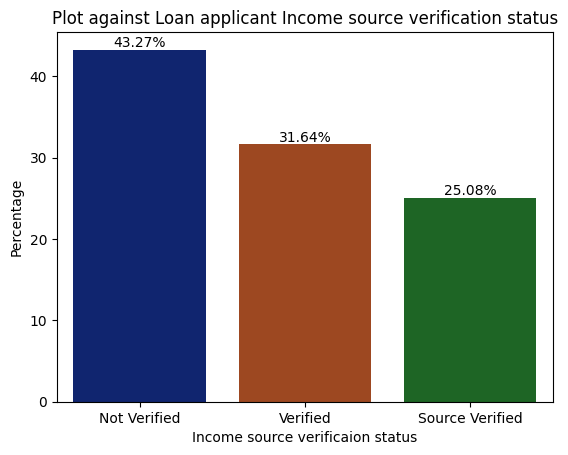

In [332]:
##### Plot against Loan applicant Income source verification status

ax = sns.barplot(data = df_clean['verification_status'].value_counts(normalize = True)*100, palette = 'dark')

plt.title('Plot against Loan applicant Income source verification status')
plt.xlabel('Income source verificaion status')
plt.ylabel('Percentage') 
#plt.xticks(rotation = 90)

# Display counts on each bar
for container in ax.containers:
    ax.bar_label(container, fmt = "%.2f%%")

plt.show()

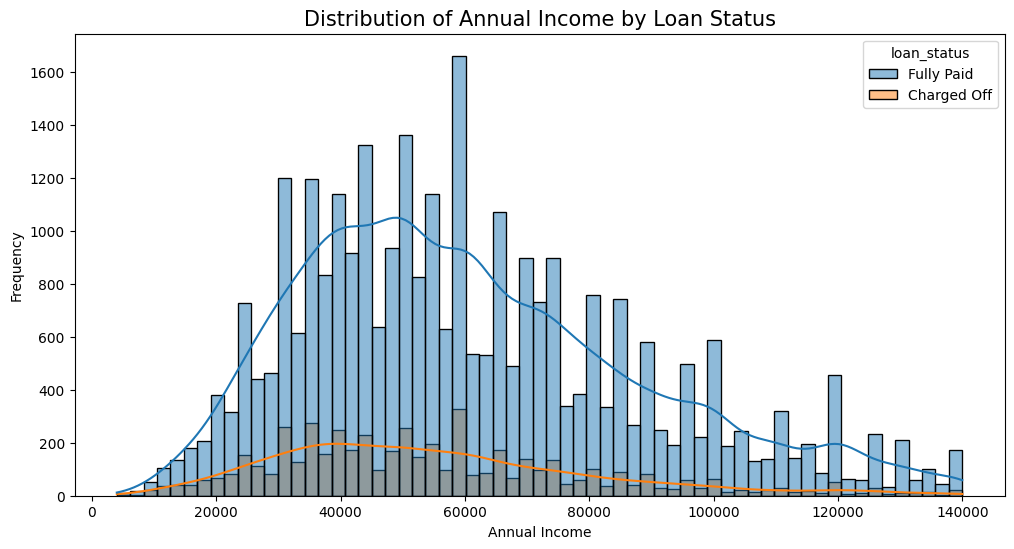

In [333]:
############---------- Segmented Univariate Analysis -------#####################

##########  Annual income Vs Loan Status #################

plt.figure(figsize=(12,6))

sns.histplot(data=df_cleaned, x='annual_inc', hue='loan_status', kde=True)

plt.title('Distribution of Annual Income by Loan Status', fontsize=15)
plt.xlabel('Annual Income', fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)

plt.show()

In [334]:
df_clean_seg = df_clean.copy()

In [335]:
#### Segment univariate analysis for Interest Rate

labels = ['5-9', '10-13', '14-17','18-21','22-25']

df_clean_seg['int_rate_group'] = pd.cut(df_clean['int_rate'], bins = 5, labels = labels)

# normalize = True , normalize the data from 0 to 1
# Unstack() reshapes the dataframe. The unique becomes the column name
df_clean_interest_rate = df_clean_seg.groupby(['int_rate_group'])['loan_status'].value_counts(normalize = True).unstack()

print(df_clean_interest_rate)

loan_status     Charged Off  Fully Paid
int_rate_group                         
5-9                0.059923    0.940077
10-13              0.129381    0.870619
14-17              0.188272    0.811728
18-21              0.291716    0.708284
22-25              0.403013    0.596987


<Figure size 600x700 with 0 Axes>

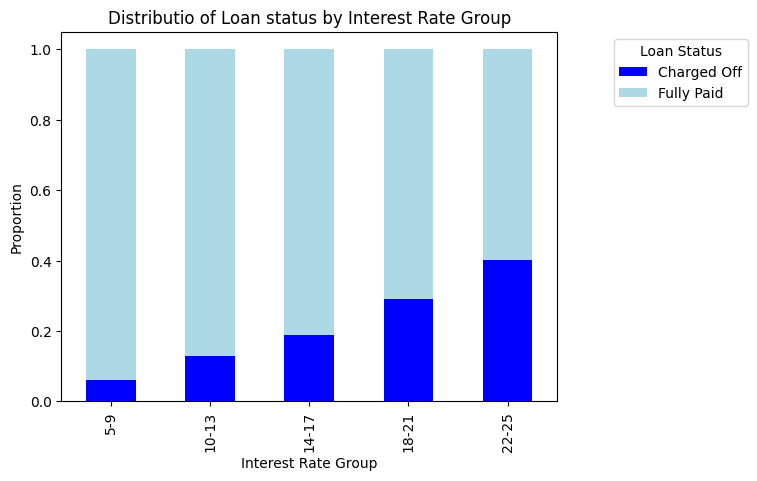

In [336]:
# Distributio of Loan status by Interest Rate Group

plt.figure(figsize = [6,7])

df_clean_interest_rate.plot(kind = 'bar', stacked = True, color = ['blue', 'lightblue'])

plt.title('Distributio of Loan status by Interest Rate Group')
plt.xlabel('Interest Rate Group')
plt.ylabel('Proportion')

# add legend
plt.legend(title = 'Loan Status', bbox_to_anchor=(1.10, 1), loc = 'upper left')

plt.show()

In [337]:
#### Segement on Annual Income

labels = ['3K-20K', '21K-30K', '31K-40K','41K-50K','51K-60K', '61K-70K','71K-80K','81K-90K','91K-100K','101k-110k', 
          '111k-120K', '121K-130K', '131K-140K', '141K-150K']

df_clean_seg['annual_inc_group'] = pd.cut(df_cleaned['annual_inc'], bins = 14, labels = labels)

df_clean_annual_income = df_clean_seg.groupby(['annual_inc_group'])['loan_status'].value_counts(normalize = True).unstack()
df_clean_annual_income

loan_status,Charged Off,Fully Paid
annual_inc_group,,
3K-20K,0.247492,0.752508
21K-30K,0.189986,0.810014
31K-40K,0.176268,0.823732
41K-50K,0.172013,0.827987
51K-60K,0.149786,0.850214
61K-70K,0.150992,0.849008
71K-80K,0.131909,0.868091
81K-90K,0.124274,0.875726
91K-100K,0.114223,0.885777


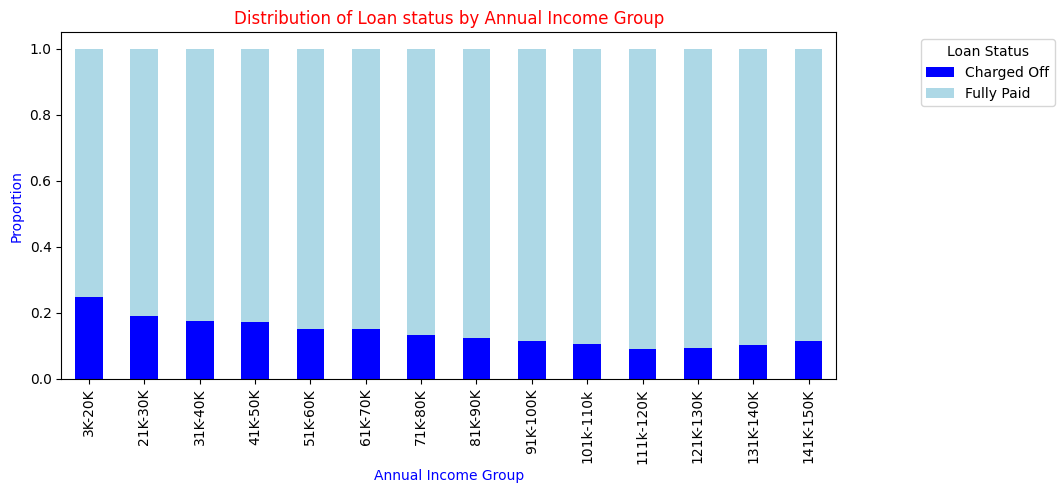

In [338]:
##### Distribution of Loan status by Annual Income Group

df_clean_annual_income.plot(kind = 'bar', stacked = True, figsize = [10,4.5] ,color = ['blue', 'lightblue'])

plt.title('Distribution of Loan status by Annual Income Group', color = 'Red')
plt.xlabel('Annual Income Group', color = 'blue')
plt.ylabel('Proportion', color = 'blue')

# add legend
plt.legend(title = 'Loan Status', bbox_to_anchor=(1.10, 1), loc = 'upper left')

plt.show()

In [339]:
#### Segment on Loan Amount
df_clean_seg['loan_amnt_segment'] = pd.cut(df_clean['loan_amnt'], 
                                         bins = [0, 5000, 10000, 25000, df_clean['loan_amnt'].max()], 
                                         labels = ['Low', 'Medium', 'High', 'Very High']   )

print(df_clean_seg['loan_amnt_segment'].value_counts())

df_loan_status_crosstab = pd.crosstab(index = df_clean_seg['loan_amnt_segment'], columns = df_clean['loan_status'])
print(df_loan_status_crosstab)

# Normalize to see the percentage distribution
df_loan_status_crosstab_norm = df_loan_status_crosstab.div(df_loan_status_crosstab.sum(axis = 1), axis = 0)
df_loan_status_crosstab_norm

loan_amnt_segment
High         14868
Medium       12802
Low           9472
Very High     1435
Name: count, dtype: int64
loan_status        Charged Off  Fully Paid
loan_amnt_segment                         
Low                       1314        8158
Medium                    1642       11160
High                      2348       12520
Very High                  323        1112


loan_status,Charged Off,Fully Paid
loan_amnt_segment,,
Low,0.138725,0.861275
Medium,0.128261,0.871739
High,0.157923,0.842077
Very High,0.225087,0.774913


<Figure size 500x450 with 0 Axes>

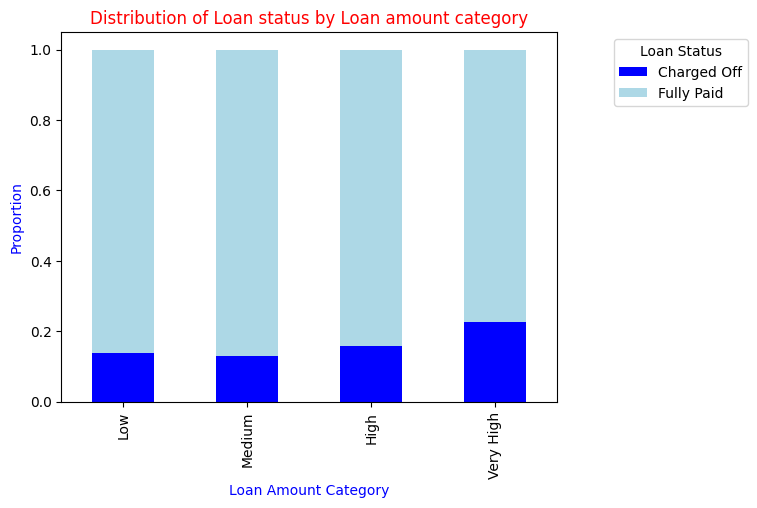

In [340]:
###### draw a bar plot to see the normalization distribution

###### Distribution of Loan status by Loan amount category

plt.figure(figsize = [5,4.5])
ax = df_loan_status_crosstab_norm.plot(kind = 'bar', stacked = True, color = ['blue', 'lightblue'])

plt.title('Distribution of Loan status by Loan amount category', color = 'Red')
plt.xlabel('Loan Amount Category', color = 'blue')
plt.ylabel('Proportion', color = 'blue')

# add legend
plt.legend(title = 'Loan Status', bbox_to_anchor=(1.10, 1), loc = 'upper left')

plt.show()

In [341]:
########### Segmented Univariate analysis for Categorical columns

# create a function to calculate percentage
def calc_percentage(df_clean, col1, col2):

    # Group the data by column2 
    grouped_data = df_clean.groupby([col1, col2])[col2]

    # Calculate sum of each group
    summed_data = grouped_data.size().reset_index(name = 'count')
    
    # Calculate total count of each group
    total_count = summed_data.groupby([col2])['count'].transform('sum')
    print(f"Total count of {total_count}")

    # Calculate percentage of each group
    summed_data['percentage'] = (summed_data['count']/total_count) * 100
    print(summed_data)

    # Retunr summed_data data set
    return summed_data 

Total count of 0    29096
1     9481
2    29096
3     9481
Name: count, dtype: int64
   loan_status        term  count  percentage
0  Charged Off   36 months   3227   11.090872
1  Charged Off   60 months   2400   25.313785
2   Fully Paid   36 months  25869   88.909128
3   Fully Paid   60 months   7081   74.686215


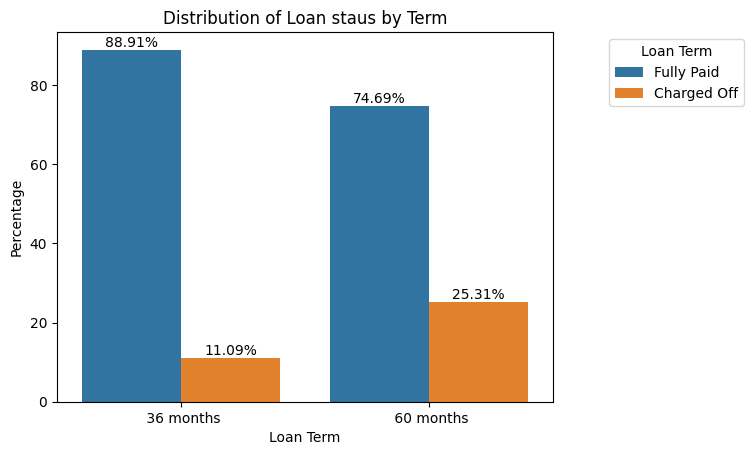

In [342]:
####### Distribution of Loan staus by Term

loan_term = calc_percentage(df_clean, 'loan_status', 'term')


# Draw a plot for Loan term Vs Status
ax = sns.barplot(data = loan_term, x = 'term', y = 'percentage', hue = 'loan_status', 
                    hue_order = ('Fully Paid', 'Charged Off'))

for container in ax.containers:
    ax.bar_label(container, fmt = "%.2f%%")    

plt.title("Distribution of Loan staus by Term")
plt.xlabel('Loan Term')
plt.ylabel('Percentage')

# Add legend
plt.legend(title = 'Loan Term', bbox_to_anchor=(1.10, 1), loc = 'upper left')

plt.show()

Total count of 0     10045
1     11675
2      7834
3      5085
4      2663
5       976
6       299
7     10045
8     11675
9      7834
10     5085
11     2663
12      976
13      299
Name: count, dtype: int64
    loan_status grade  count  percentage
0   Charged Off     A    602    5.993031
1   Charged Off     B   1425   12.205567
2   Charged Off     C   1347   17.194281
3   Charged Off     D   1118   21.986234
4   Charged Off     E    715   26.849418
5   Charged Off     F    319   32.684426
6   Charged Off     G    101   33.779264
7    Fully Paid     A   9443   94.006969
8    Fully Paid     B  10250   87.794433
9    Fully Paid     C   6487   82.805719
10   Fully Paid     D   3967   78.013766
11   Fully Paid     E   1948   73.150582
12   Fully Paid     F    657   67.315574
13   Fully Paid     G    198   66.220736


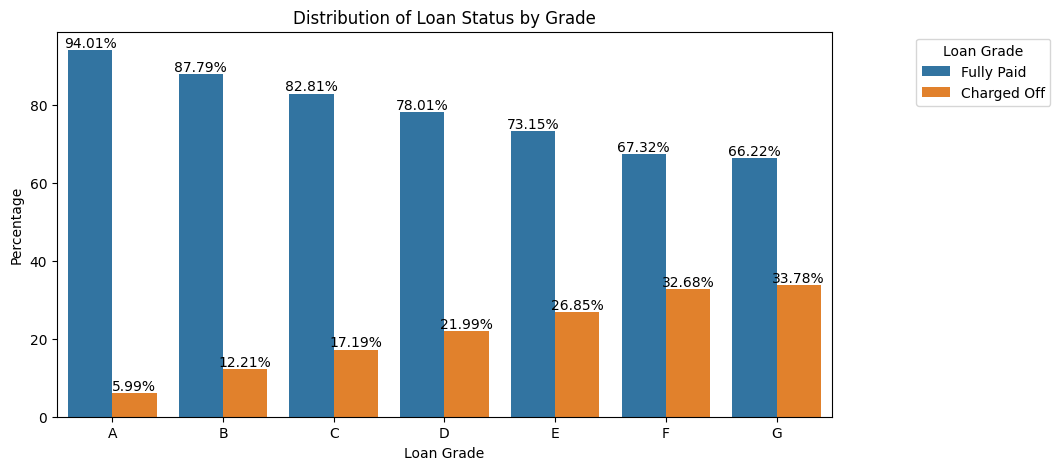

In [343]:
##### Distribution of Loan Status by Grade

loan_grade = calc_percentage(df_clean, 'loan_status', 'grade')

plt.figure(figsize = [10,5])

# Draw a plot for Loan term Vs Status
ax = sns.barplot(data = loan_grade, x = 'grade', y = 'percentage', hue = 'loan_status', hue_order = ('Fully Paid', 'Charged Off'))

for container in ax.containers:
    ax.bar_label(container, fmt = "%.2f%%")    

plt.title("Distribution of Loan Status by Grade")
plt.xlabel('Loan Grade')
plt.ylabel('Percentage')

# Add legend
plt.legend(title = 'Loan Grade', bbox_to_anchor=(1.10, 1), loc = 'upper left')

plt.show()

Total count of 0      1499
1      5027
2     18055
3       325
4      2875
5       367
6      2150
7       681
8       576
9      3865
10      102
11     1754
12      375
13      926
14     1499
15     5027
16    18055
17      325
18     2875
19      367
20     2150
21      681
22      576
23     3865
24      102
25     1754
26      375
27      926
Name: count, dtype: int64
    loan_status             purpose  count  percentage
0   Charged Off                 Car    160   10.673783
1   Charged Off         Credit_Card    542   10.781778
2   Charged Off  Debt_Consolidation   2767   15.325395
3   Charged Off         Educational     56   17.230769
4   Charged Off    Home_Improvement    347   12.069565
5   Charged Off               House     59   16.076294
6   Charged Off      Major_Purchase    222   10.325581
7   Charged Off             Medical    106   15.565345
8   Charged Off              Moving     92   15.972222
9   Charged Off               Other    633   16.377749
10  Charged Off   

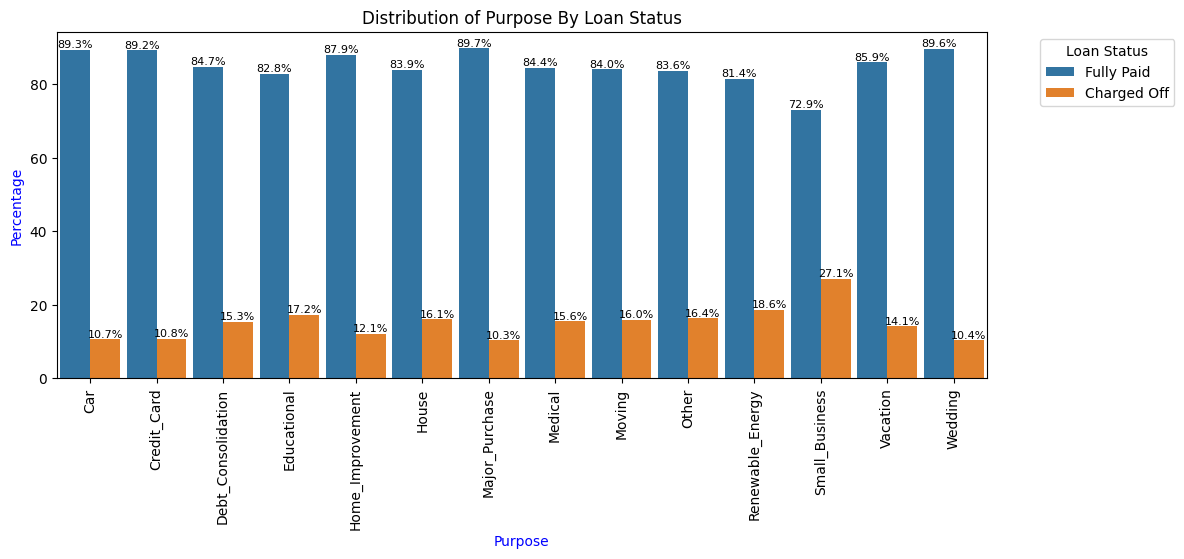

In [344]:
###### "Distribution of Purpose By Loan Status

plt.figure(figsize = [12,4.5])

# Find percentage of Purpose Vs Loan Status
loan_status_purpose = calc_percentage(df_clean,'loan_status', 'purpose')

#Plot a bar plot to see the Purpose distribution with loan status
ax = sns.barplot(data = loan_status_purpose, x = 'purpose', y = 'percentage', hue = 'loan_status', 
                 hue_order = ['Fully Paid','Charged Off'], width = 0.9, dodge=True)

plt.title("Distribution of Purpose By Loan Status")
plt.xlabel('Purpose', color = 'Blue')
plt.ylabel('Percentage', color = 'Blue')
plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container, fmt = "%.1f%%", fontsize = 8, label_type = 'edge')

plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

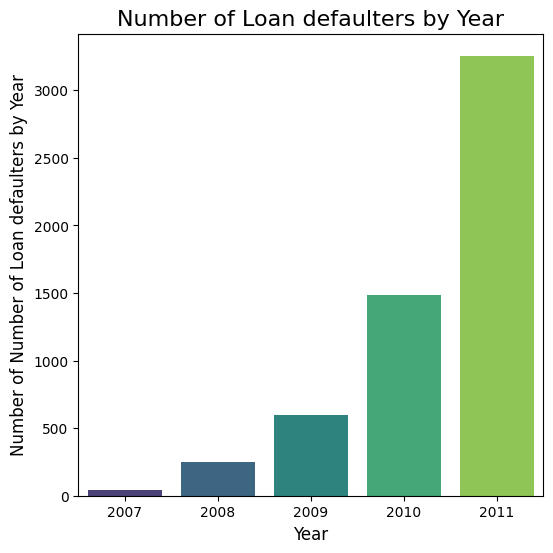

,issue_year,count
0,2007,45
1,2008,247
2,2009,594
3,2010,1485
4,2011,3256


In [345]:
############# Loan Defaulters by every year

# Filter the dataset for charged-off loans
charged_off_loans = df_clean[df_clean['loan_status'] == 'Charged Off']

# Group by year and count the number of charged-off loans
charged_off_count = charged_off_loans.groupby('issue_year').size().reset_index(name='count')

# Set the figure size
plt.figure(figsize=(6, 6))

# Bar plot to show the number of charged-off loans by year
sns.barplot(x='issue_year', y='count', data=charged_off_count, palette='viridis')

# Add labels and title
plt.title('Number of Loan defaulters by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Number of Loan defaulters by Year', fontsize=12)

# Display the plot
#plt.xticks(charged_off_count['issue_year'].unique())
#plt.grid(axis='y')
plt.show()
charged_off_count

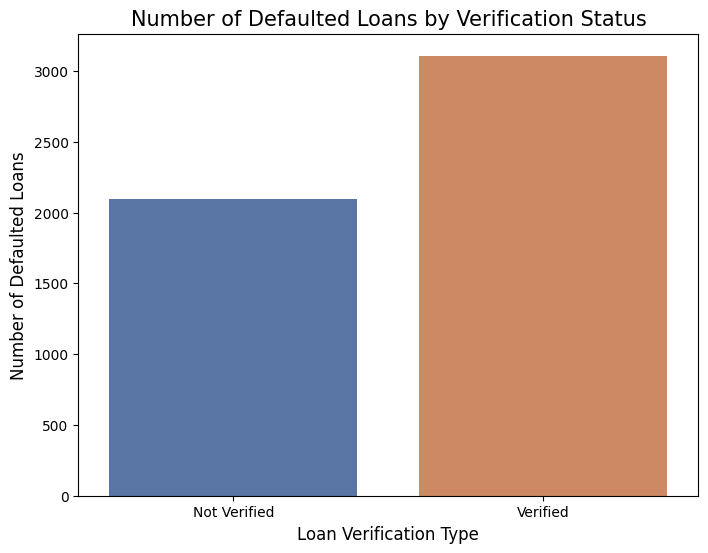

In [346]:
############################---------- BIVARIATE ANALYSIS -------------------------- #########################################

#----- Analysing of loan defaulter (loan_status='Charged  Off') with loan verification status

# merge verification types [merging verification status 'Verified' & 'Source Verified' as 'Verified']
df_cleaned['verification_status'] = df_cleaned['verification_status'].replace({'Verified': 'Verified','Source Verified': 'Verified'})

# grouping the defaulted data by verification status
defaulted_counts = df_cleaned[df_cleaned['loan_status'] == 'Charged Off'].groupby('verification_status').size().reset_index(name='count')

# bar plot to show number of defaulted loan by verification status
plt.figure(figsize=(8, 6))
sns.barplot(data=defaulted_counts, x='verification_status', y='count',hue='verification_status',palette='deep')

# adding titles and label
plt.title('Number of Defaulted Loans by Verification Status', fontsize=15)
plt.xlabel('Loan Verification Type', fontsize=12)
plt.ylabel('Number of Defaulted Loans', fontsize=12)
plt.show()  # show bar plot


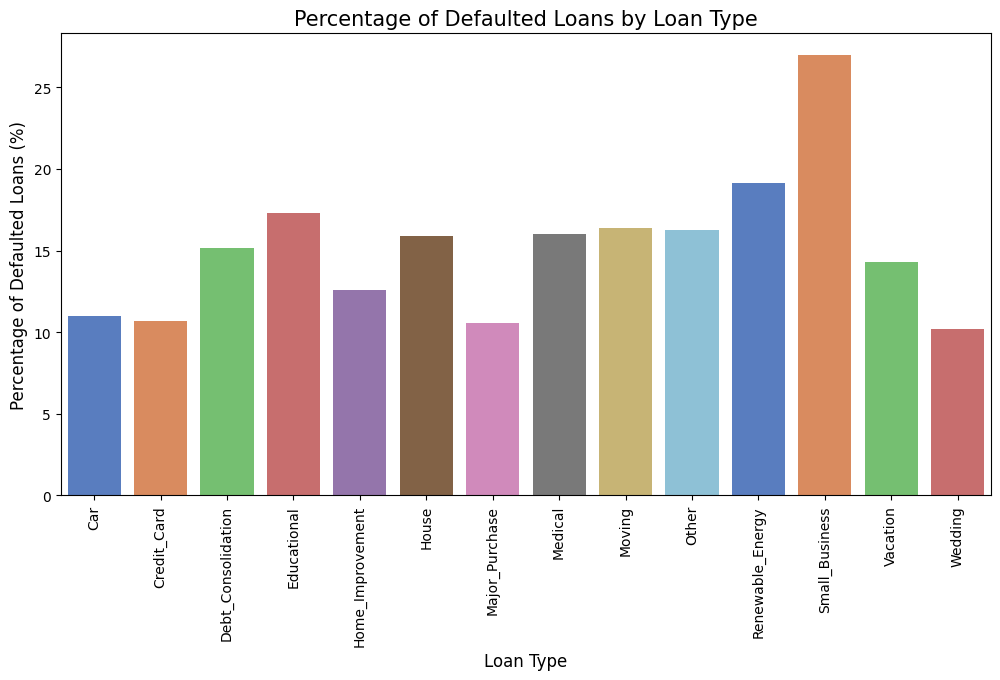

In [347]:
#----- Analysing of loan defaulter (loan_status='Charged  Off') with loan purpose

# calculate percentage of defaulted loans by loan type
percentage_defaulted = df_cleaned.groupby('purpose')['loan_status'].value_counts(normalize=True).unstack().fillna(0)
percentage_defaulted['percentage_defaulted'] = percentage_defaulted['Charged Off'] * 100

# bar plot to show percentage of loan default by loan purpose
plt.figure(figsize=(12, 6))
sns.barplot(data=percentage_defaulted.reset_index(), x='purpose', y='percentage_defaulted',hue='purpose',palette='muted')

# adding titles and label
plt.title('Percentage of Defaulted Loans by Loan Type', fontsize=15)
plt.xlabel('Loan Type', fontsize=12)
plt.ylabel('Percentage of Defaulted Loans (%)', fontsize=12)
plt.xticks(rotation=90)
plt.show()  # show bar plot


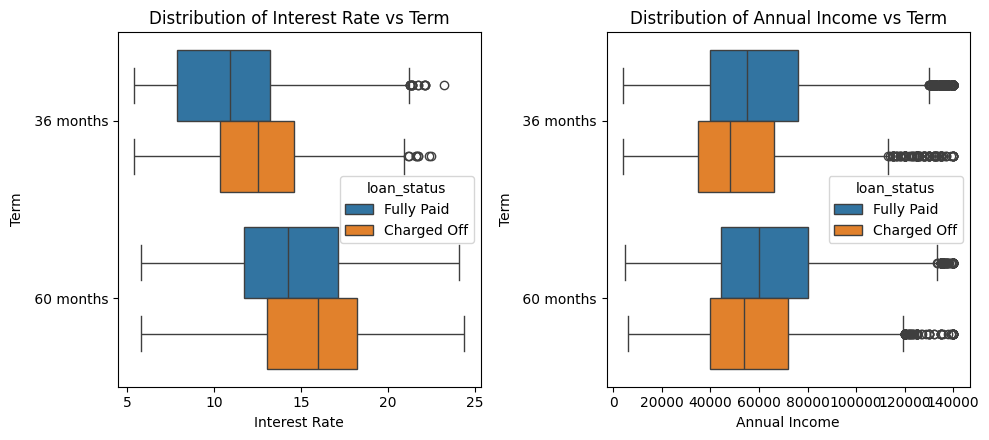

In [348]:
########## Distribution of Interest Rate vs Term

fig, axes = plt.subplots(1, 2, figsize=(10, 4.5))

sns.boxplot(ax = axes[0], data = df_clean, x = "int_rate", y = "term", hue = 'loan_status')
axes[0].set_title("Distribution of Interest Rate vs Term", fontsize = 12)
axes[0].set_xlabel('Interest Rate',fontsize = 10)
axes[0].set_ylabel('Term', fontsize = 10)


######### Distribution of Annual Income vs Term

sns.boxplot(ax = axes[1],data = df_cleaned, x = "annual_inc",y = "term",hue = 'loan_status')
axes[1].set_title("Distribution of Annual Income vs Term", fontsize = 12)
axes[1].set_xlabel('Annual Income',  fontsize = 10)
axes[1].set_ylabel('Term',fontsize = 10)

plt.tight_layout()
plt.show()

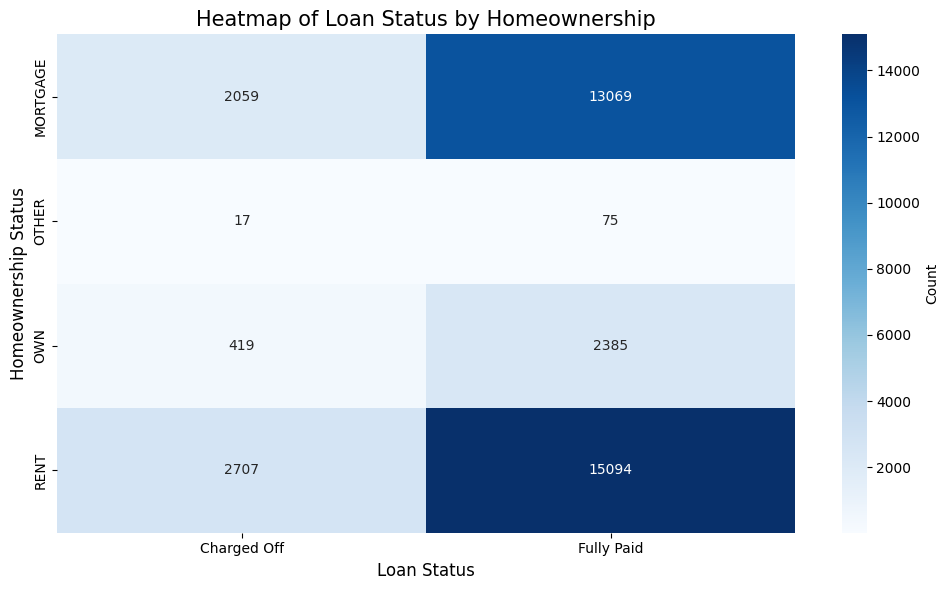

In [349]:
#----- Analysing of loan status with home ownership

# filtering dataset by removing all the rows with home ownership as NONE
df_cleaned = df_cleaned[df_cleaned['home_ownership'] != 'NONE']

# group by home ownership and loan status
heatmap_value = df_cleaned.groupby(['home_ownership', 'loan_status']).size().unstack(fill_value=0)

# plotting heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_value, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})

# adding titles and labels
plt.title('Heatmap of Loan Status by Homeownership', fontsize=15)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Homeownership Status', fontsize=12)
plt.tight_layout()
plt.show()  # show heatmap

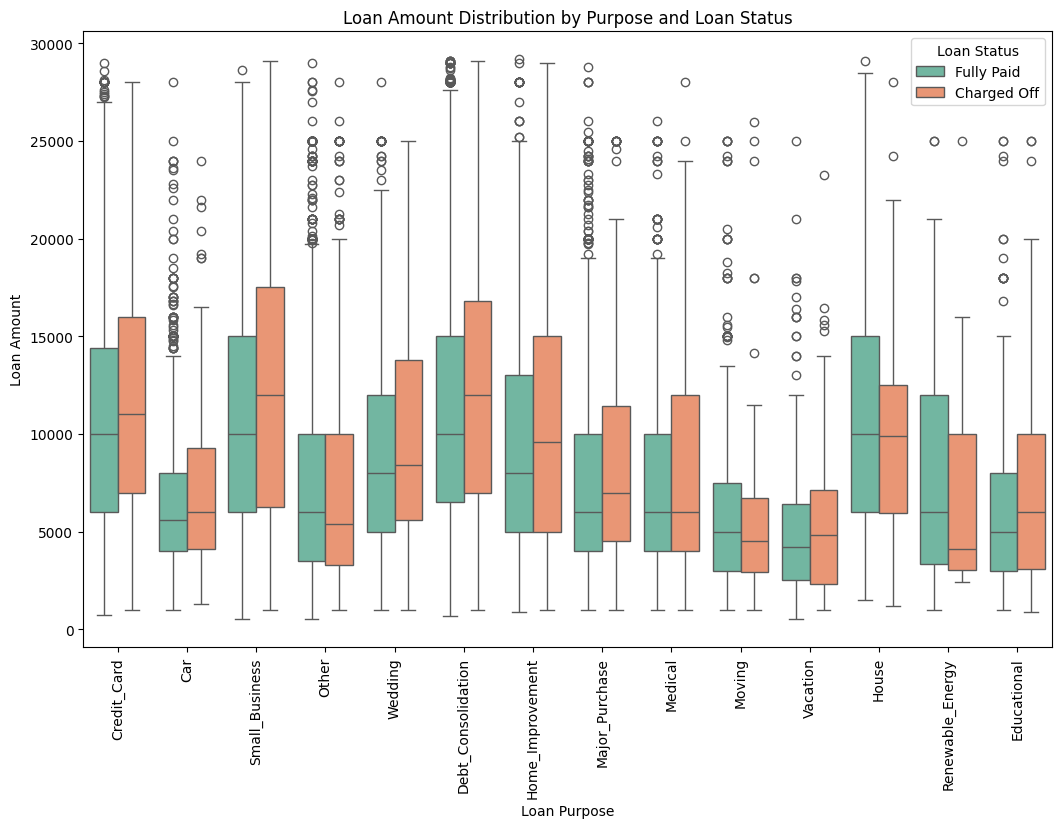

In [350]:
############### MULTIVARIATE ANALYSIS ##################

## ------------ Analyzing Loan Amount Distribution by Purpose and Loan Status ---------------- ##

Q1 = df['loan_amnt'].quantile(0.25)
Q3 = df['loan_amnt'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Determine outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Remove outliers
df_cleaned_LA = df_cleaned[(df_cleaned['loan_amnt'] >= lower_bound) & (df_cleaned['loan_amnt'] <= upper_bound)]

plt.figure(figsize=(12.5, 8))
sns.boxplot(x='purpose', y='loan_amnt', hue='loan_status', data=df_cleaned_LA, palette='Set2')
plt.title('Loan Amount Distribution by Purpose and Loan Status')
plt.xlabel('Loan Purpose')
plt.ylabel('Loan Amount')
plt.xticks(rotation=90)
plt.legend(title='Loan Status')
plt.show()
#print(len(df_cleaned)-len(df_cleaned_LA))

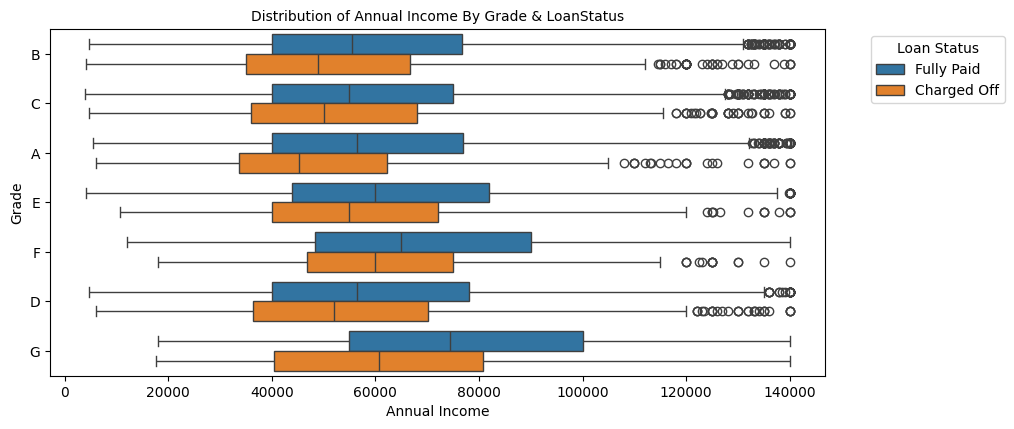

In [351]:
#### Distribution of Annual Income By Grade & LoanStatus

plt.figure(figsize = [10, 4.5])
sns.boxplot(data=df_cleaned, x="annual_inc",y="grade", hue='loan_status')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Distribution of Annual Income By Grade & LoanStatus', fontsize=10)
plt.xlabel('Annual Income')
plt.ylabel('Grade')

plt.show()

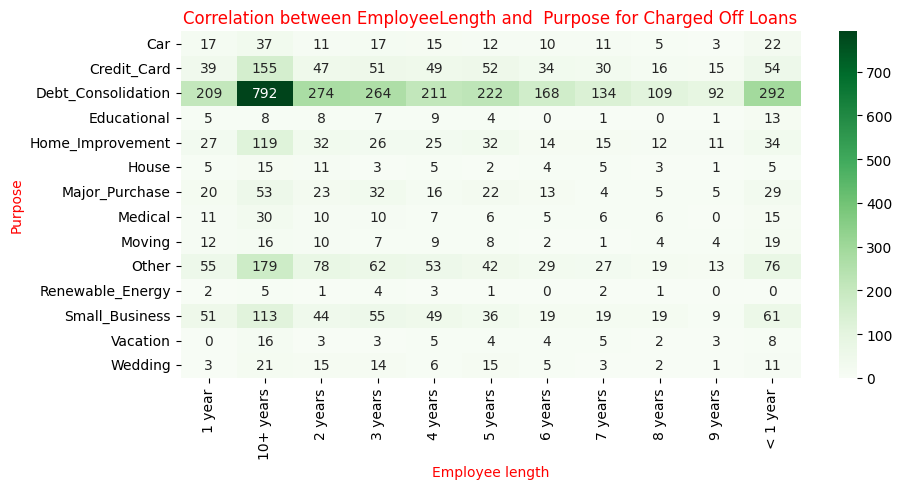

In [352]:

######## Correlation between EmployeeLength and  Purpose for Charged Off Loans
plt.figure(figsize =[10,4.5])
sns.heatmap(purpose_emplength, annot=True, fmt="d", cmap = 'Greens')
plt.title('Correlation between EmployeeLength and  Purpose for Charged Off Loans' , color = 'Red')
plt.xlabel('Employee length', color = 'Red')
plt.ylabel('Purpose', color = 'Red')

plt.show()

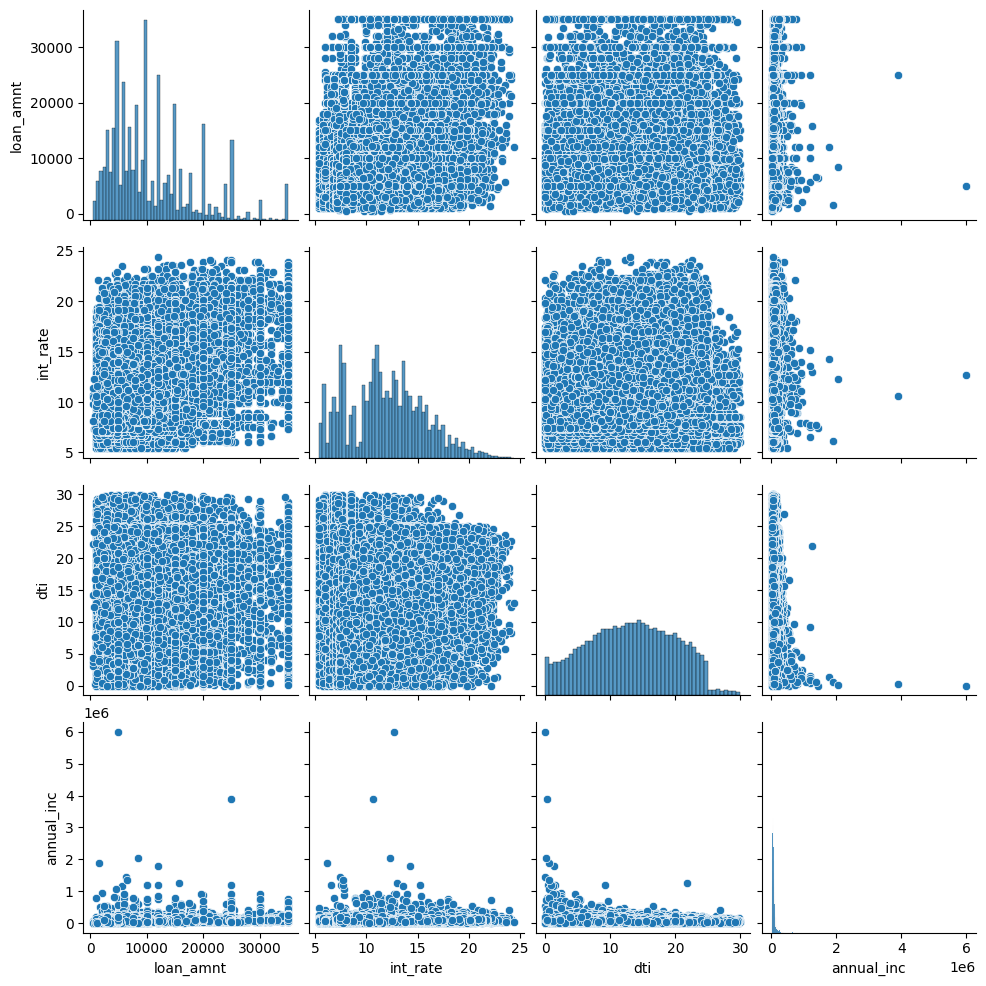

In [353]:
# Pair plot for 'loan_amnt', 'int_rate', 'dti', 'annual_inc' columns

sns.pairplot(df_clean[['loan_amnt', 'int_rate', 'dti', 'annual_inc']])
plt.show()

In [354]:
# Define a correlation_matrix for numeric varaibles

correlation_matrix = df_clean.corr(numeric_only = True)
correlation_matrix

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,issue_year
loan_amnt,1.000000,0.301265,0.268999,0.062436,-0.031951,0.177200,-0.049997,0.063424,0.256179,-0.035141,0.109814
int_rate,0.301265,1.000000,0.048899,0.110913,0.158479,0.006022,0.098635,0.466790,-0.046539,0.084016,0.039417
annual_inc,0.268999,0.048899,1.000000,-0.121530,0.022229,0.156927,-0.017864,0.016685,0.234534,-0.015955,0.008558
dti,0.062436,0.110913,-0.121530,1.000000,-0.033347,0.287849,-0.004742,0.278680,0.229119,0.007315,0.092857
delinq_2yrs,-0.031951,0.158479,0.022229,-0.033347,1.000000,0.011649,0.007623,-0.042567,0.066994,0.002970,-0.003145
open_acc,0.177200,0.006022,0.156927,0.287849,0.011649,1.000000,0.000028,-0.089864,0.687260,0.005616,0.011357
pub_rec,-0.049997,0.098635,-0.017864,-0.004742,0.007623,0.000028,1.000000,0.058914,-0.023494,0.841571,-0.006026
revol_util,0.063424,0.466790,0.016685,0.278680,-0.042567,-0.089864,0.058914,1.000000,-0.070611,0.060591,0.066256
total_acc,0.256179,-0.046539,0.234534,0.229119,0.066994,0.687260,-0.023494,-0.070611,1.000000,-0.009998,0.052972
pub_rec_bankruptcies,-0.035141,0.084016,-0.015955,0.007315,0.002970,0.005616,0.841571,0.060591,-0.009998,1.000000,0.011869


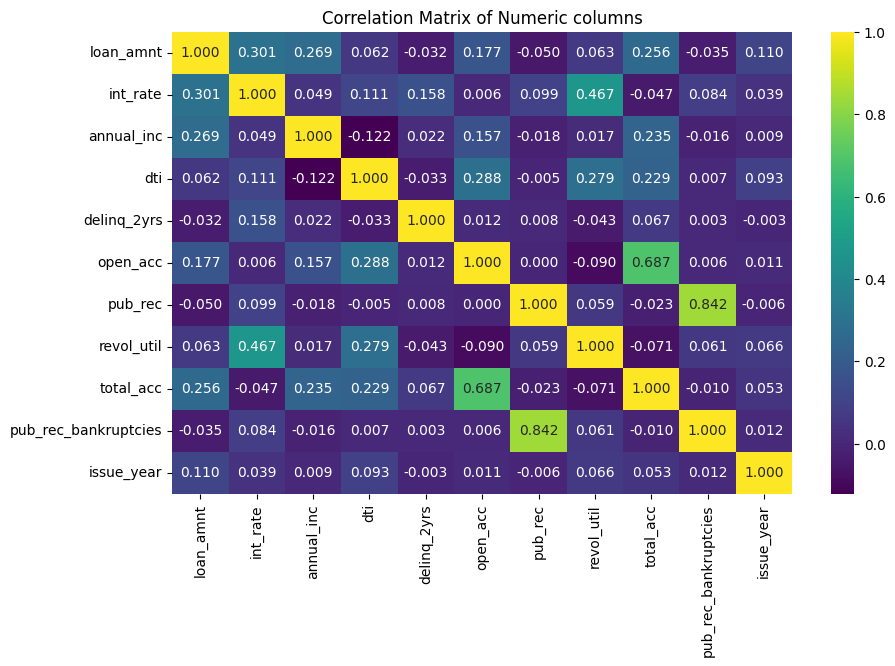

In [355]:
# Correlation Matrix of Numeric columns

plt.figure(figsize = (10,6))
sns.heatmap(correlation_matrix, annot = True, fmt = ".3f", cmap='viridis')

plt.title("Correlation Matrix of Numeric columns")
plt.show()

In [356]:
defaulters = df_clean[df_clean['loan_status'] == 'Charged Off']
non_defaulters = df_clean[df_clean['loan_status'] == 'Fully Paid']


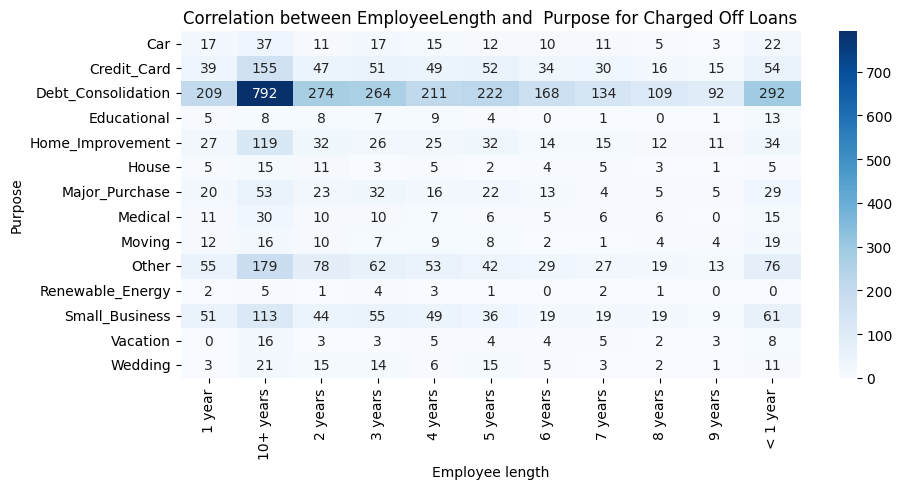

In [357]:
### Correlation between EmployeeLength and  Purpose for Charged Off Loans
purpose_emplength = pd.crosstab(defaulters['purpose'], defaulters['emp_length'])
purpose_emplength

plt.figure(figsize =[10,4.5])
sns.heatmap(purpose_emplength, annot=True, fmt="d", cmap = 'Blues')
plt.title('Correlation between EmployeeLength and  Purpose for Charged Off Loans' )
plt.xlabel('Employee length')
plt.ylabel('Purpose')

plt.show()

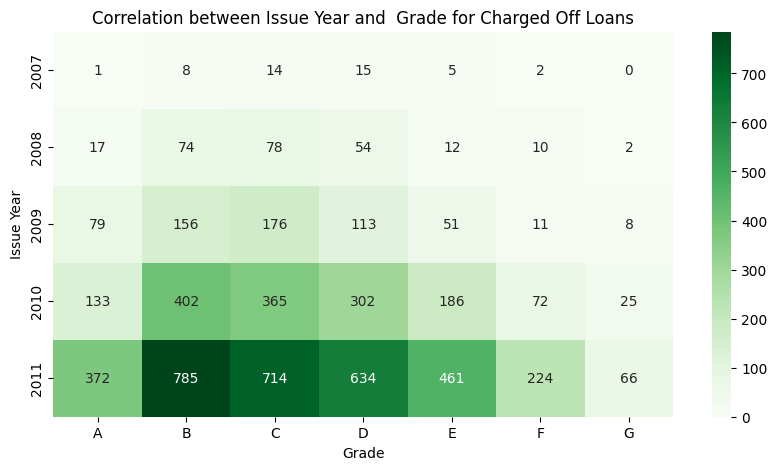

In [358]:
########## Correlation between Issue Year and  Grade for Charged Off Loans

issue_year_grade = pd.crosstab(defaulters['issue_year'], defaulters['grade'])
issue_year_grade

plt.figure(figsize = [10,5])
sns.heatmap(issue_year_grade, annot=True, fmt="d", cmap = 'Greens')
plt.title('Correlation between Issue Year and  Grade for Charged Off Loans')
plt.xlabel('Grade')
plt.ylabel('Issue Year')
plt.show()

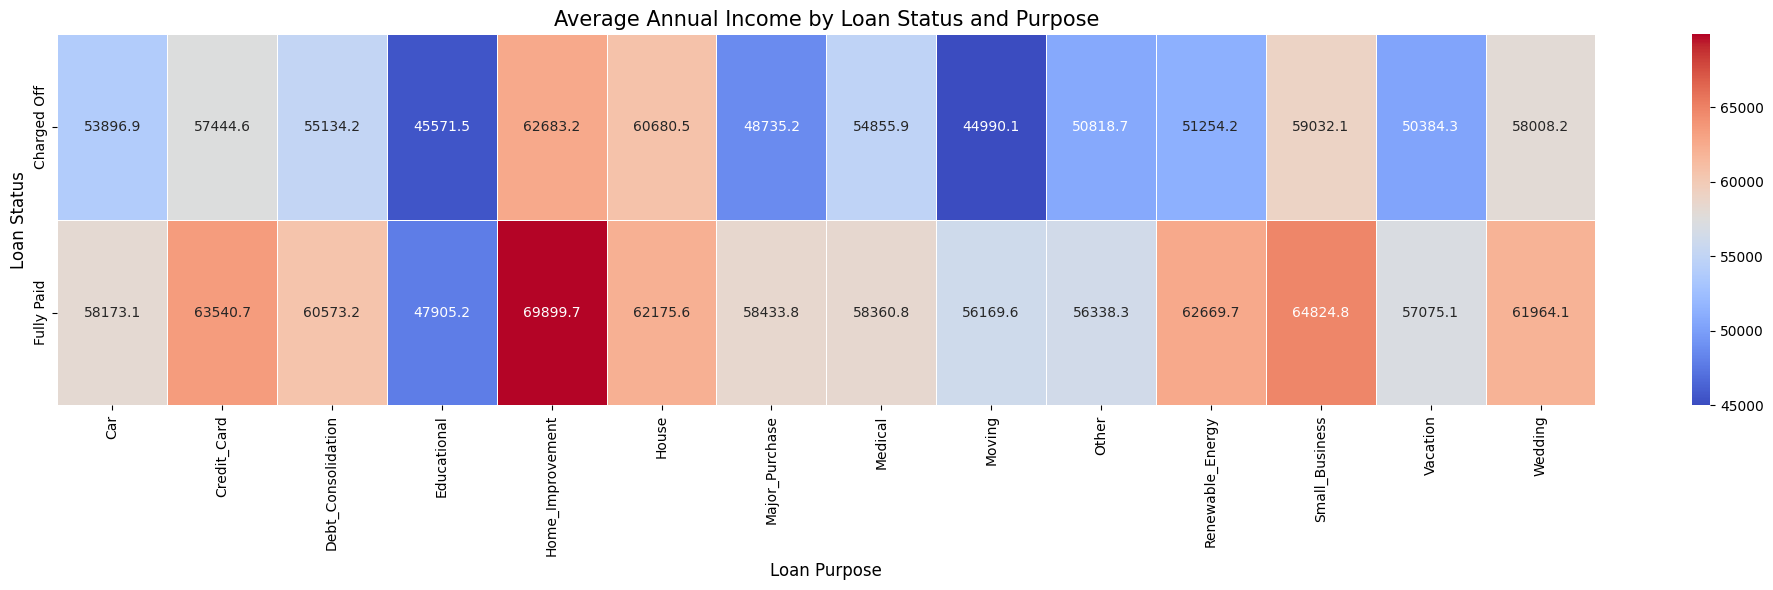

In [359]:
#----- Analysing of loan status with annual income and loan purpose

# group by loan status, loan purpose & annual income, also getting the average of annual income
heatmap_value = df_cleaned.groupby(['loan_status', 'purpose'])['annual_inc'].mean().unstack()

# plotting heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(heatmap_value, annot=True, fmt="1.1f", cmap='coolwarm', linewidths=.5)

# adding titles and labels
plt.title('Average Annual Income by Loan Status and Purpose', fontsize=15)
plt.xlabel('Loan Purpose', fontsize=12)
plt.ylabel('Loan Status', fontsize=12)
plt.tight_layout()
plt.show()  # show plot
